## CME538 GROUP PROJECT

TTC SUBWAY EXPLORATORY DATA ANALYSIS DATA VISUALIZATIONS PART 1

### Set up Notebook

In [1]:
import pandas as pd
# 3rd party imports
import os
import json
import seaborn as sns
from datetime import datetime
import matplotlib.pylab as plt
import math
import numpy as np

# Configure Notebook
#for plots to be inline
%matplotlib inline 
#for auto_complete 
%config Completer.use_jedi = False 

In [2]:
# Import data
ttc_subway_df = pd.read_csv("ttc_subway_df.csv")
ttc_bus_df = pd.read_csv("ttc_bus_df.csv")
octranspo_df = pd.read_csv("OC_Transpo_Bus_Info_With_Times.csv")
stm_df = pd.read_csv("stm_df.csv")


C:\Users\diana\AppData\Local\Temp\ipykernel_23140\3802667290.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  ttc_bus_df = pd.read_csv("ttc_bus_df.csv")



### TTC SUBWAY

In [3]:
ttc_subway_df.head()

,Unnamed: 0,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,0,2022-01-01,15:59,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023
1,1,2022-01-01,02:23,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0
2,2,2022-01-01,22:00,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0
3,3,2022-01-01,02:28,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0
4,4,2022-01-01,02:34,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981


In [4]:
# print dataframe info
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108004 entries, 0 to 108003
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  108004 non-null  int64 
 1   Date        108004 non-null  object
 2   Time        108004 non-null  object
 3   Day         108004 non-null  object
 4   Station     108004 non-null  object
 5   Code        108004 non-null  object
 6   Min Delay   108004 non-null  int64 
 7   Min Gap     108004 non-null  int64 
 8   Bound       79240 non-null   object
 9   Line        107675 non-null  object
 10  Vehicle     108004 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 9.1+ MB


In [5]:
#Convert the 'Date' colum to datetime format
ttc_subway_df['Date'] = pd.to_datetime(ttc_subway_df['Date'])
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108004 entries, 0 to 108003
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  108004 non-null  int64         
 1   Date        108004 non-null  datetime64[ns]
 2   Time        108004 non-null  object        
 3   Day         108004 non-null  object        
 4   Station     108004 non-null  object        
 5   Code        108004 non-null  object        
 6   Min Delay   108004 non-null  int64         
 7   Min Gap     108004 non-null  int64         
 8   Bound       79240 non-null   object        
 9   Line        107675 non-null  object        
 10  Vehicle     108004 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 9.1+ MB


In [6]:
# Set the data colum as the index
#Subway DF
ttc_subway_df.set_index('Date', inplace = True)
ttc_subway_df.head()



,Unnamed: 0,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
Date,,,,,,,,,,
2022-01-01,0,15:59,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023
2022-01-01,1,02:23,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0
2022-01-01,2,22:00,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0
2022-01-01,3,02:28,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0
2022-01-01,4,02:34,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981


### Time-based indexing

In [7]:
# Add new columns 'year', 'month' and 'month_day'that indicate the year, month and day associated with each observation

ttc_subway_df['year'] = ttc_subway_df.index.year
ttc_subway_df['month'] = ttc_subway_df.index.month
ttc_subway_df['month_day'] = ttc_subway_df.index.day
ttc_subway_df.tail()

,Unnamed: 0,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,month_day
Date,,,,,,,,,,,,,
2021-12-31,107999,01:10,Friday,MUSEUM STATION,SUUT,0,0,N,YU,5591,2021,12,31
2021-12-31,108000,01:12,Friday,FINCH STATION,SUDP,5,10,S,YU,5983,2021,12,31
2021-12-31,108001,01:21,Friday,EGLINTON WEST STATION,PUOPO,3,8,N,YU,6046,2021,12,31
2021-12-31,108002,01:37,Friday,SHEPPARD WEST STATION,SUDP,0,0,S,YU,5536,2021,12,31
2021-12-31,108003,07:00,Friday,DON MILLS STATION,TUSC,0,0,E,SHP,6146,2021,12,31


In [8]:
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108004 entries, 2022-01-01 to 2021-12-31
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  108004 non-null  int64 
 1   Time        108004 non-null  object
 2   Day         108004 non-null  object
 3   Station     108004 non-null  object
 4   Code        108004 non-null  object
 5   Min Delay   108004 non-null  int64 
 6   Min Gap     108004 non-null  int64 
 7   Bound       79240 non-null   object
 8   Line        107675 non-null  object
 9   Vehicle     108004 non-null  int64 
 10  year        108004 non-null  int32 
 11  month       108004 non-null  int32 
 12  month_day   108004 non-null  int32 
dtypes: int32(3), int64(4), object(6)
memory usage: 10.3+ MB


### TTC BUS 

In [9]:
#Convert the 'Date' colum to datetime format
ttc_bus_df['Date'] = pd.to_datetime(ttc_bus_df['Date'])
ttc_bus_df.info()

KeyError: 'Date'

In [10]:
# Set the data colum as the index

ttc_bus_df.set_index('Date', inplace = True)
ttc_bus_df.head()

KeyError: "None of ['Date'] are in the columns"

In [ ]:
plt.figure(figsize=(6,3))
sns.lineplot(x=ttc_bus_df.index, y=ttc_bus_df['Min Delay'])

# Set labels 
plt.xlabel('Date-Time', fontsize=12)
plt.ylabel('Delay', fontsize=12)
plt.title("Delay in Toronto Buses")

plt.show()

### Outliers

In [ ]:
ttc_subway_df.describe()

In [ ]:
# Create probability density plot 
plt.figure(figsize=(6,3))
ttc_delays=sns.distplot(ttc_subway_df['Min Delay'], label='Distribution of subway delays')

# Set labels and legend
plt.xlabel('Delays in minutes', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Distribution of subway delays')

#Change tick sizes
ttc_delays.xaxis.set_tick_params(labelsize=8)
ttc_delays.yaxis.set_tick_params(labelsize=8)

# Show the plot
plt.show()

In [ ]:
#Remove Min Delay outliers
# Calculate the quartiles and IQR
Q1= ttc_subway_df['Min Delay'].quantile(0.25)
Q3= ttc_subway_df['Min Delay'].quantile(0.75)
IQR =Q3-Q1

#Define the bounds for outlier removal
lower_bound= Q1-1.5*IQR
upper_bound= Q3 +1.5*IQR

#Remove outliers by creating a mask
mask= (ttc_subway_df['Min Delay']<= upper_bound)
ttc_subway_df = ttc_subway_df[mask]

# View DataFrame
ttc_subway_df.info()

In [ ]:
ttc_bus_df.describe()

In [199]:
ttc_bus_daily = ttc_bus_df.groupby("Report Date").mean("Min Delay").reset_index()
ttc_bus_daily["Report Date"] = pd.to_datetime(ttc_bus_daily["Report Date"])

ttc_bus_daily["weekday"] = ttc_bus_daily["Report Date"].dt.weekday

ttc_bus_daily.head()


,Report Date,Unnamed: 0,Min Delay,Min Gap,Vehicle,weekday
0,2018-01-01,84.5,18.670588,32.241176,5563.447205,0
1,2018-01-02,316.5,16.646259,26.044218,5897.653137,1
2,2018-01-03,581.5,16.459574,26.463830,6172.705357,2
3,2018-01-04,835.5,18.617647,28.599265,6277.352941,3
4,2018-01-05,1111.5,10.978571,21.071429,5692.337079,4


In [210]:
ttc_bus_daily.groupby("weekday").mean("Min Delay").reset_index()


,weekday,Unnamed: 0,Min Delay,Min Gap,Vehicle
0,0,166288.230000,22.107403,33.600986,5563.643189
1,1,166445.601667,21.023552,32.369878,5564.669328
2,2,166638.734114,21.092614,32.339697,5551.023210
3,3,166810.379599,20.231165,31.294528,5548.385030
4,4,166981.836120,21.682341,32.851267,5507.932264
5,5,167127.627090,25.465418,37.876898,5378.823451
6,6,166720.158863,24.738104,37.644840,5430.473261


In [213]:

ttc_bus_daily['weekday'] = ttc_bus_daily['weekday'].replace({
        "0": 'Monday', "1": 'Tuesday', "2": 'Wednesday', "3": 'Thursday', "4": 'Friday', "5": 'Saturday', "6":'Sunday'})

ttc_bus_daily.head()

,Report Date,Unnamed: 0,Min Delay,Min Gap,Vehicle,weekday
0,2018-01-01,84.5,18.670588,32.241176,5563.447205,Monday
1,2018-01-02,316.5,16.646259,26.044218,5897.653137,Tuesday
2,2018-01-03,581.5,16.459574,26.463830,6172.705357,Wednesday
3,2018-01-04,835.5,18.617647,28.599265,6277.352941,Thursday
4,2018-01-05,1111.5,10.978571,21.071429,5692.337079,Friday


<Figure size 1500x600 with 0 Axes>

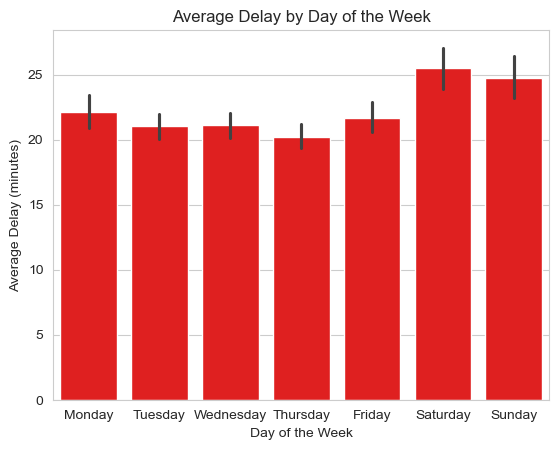

<Figure size 1500x600 with 0 Axes>

In [230]:
ax = sns.barplot(data=ttc_bus_daily, x = "weekday", y = "Min Delay", color="red", )
plt.title("Average Delay by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Delay (minutes)")
plt.figure(figsize=(15,6))


In [ ]:
ttc_bus_df.head()

In [ ]:
ttc_subway_df.head()

In [ ]:
# Unique values in the dataframe
print ('Number of unique Stations:',ttc_subway_df['Station'].nunique())
print ('Number of unique codes:',ttc_subway_df['Code'].nunique())
print ('Number of unique bound:',ttc_subway_df['Bound'].nunique())
print ('Number of unique lines:',ttc_subway_df['Line'].nunique())
print ('Number of unique vehicles:',ttc_subway_df['Vehicle'].nunique())



### Reliability calcs

In [19]:
TTC_ridesperday_dict = {
    "0": math.ceil((13)*60/4.5 + (3+4)*60/4.5)*4,
    "1": math.ceil((13)*60/4.5 + (3+4)*60/4.5)*4,
    "2": math.ceil((13)*60/4.5 + (3+4)*60/4.5)*4,
    "3": math.ceil((13)*60/4.5 + (3+4)*60/4.5)*4,
    "4": math.ceil((13)*60/4.5 + (3+4)*60/4.5)*4,
    "5": math.ceil(20*60/4.5)*4,
    "6": math.ceil(18*60/8)*4
}



In [20]:
ttc_subway_df_temp = ttc_subway_df.reset_index()

ttc_subway_df_temp.head()

,Date,Unnamed: 0,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,month_day
0,2022-01-01,0,15:59,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023,2022,1,1
1,2022-01-01,1,02:23,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0,2022,1,1
2,2022-01-01,2,22:00,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0,2022,1,1
3,2022-01-01,3,02:28,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0,2022,1,1
4,2022-01-01,4,02:34,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981,2022,1,1


In [21]:
ttc_subway_df_temp["day"] = ttc_subway_df_temp["Date"].dt.date
ttc_subway_df_temp["weekday"] = ttc_subway_df_temp["Date"].dt.weekday

ttc_subway_df_daily = ttc_subway_df_temp.groupby(["day", "weekday"]).count().reset_index()

In [22]:
ttc_subway_df_daily


,day,weekday,Date,Unnamed: 0,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,month_day
0,2018-01-01,0,58,58,58,58,58,58,58,58,42,58,58,58,58,58
1,2018-01-02,1,75,75,75,75,75,75,75,75,59,74,75,75,75,75
2,2018-01-03,2,67,67,67,67,67,67,67,67,59,67,67,67,67,67
3,2018-01-04,3,63,63,63,63,63,63,63,63,45,63,63,63,63,63
4,2018-01-05,4,78,78,78,78,78,78,78,78,66,78,78,78,78,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,2023-09-26,1,69,69,69,69,69,69,69,69,43,69,69,69,69,69
2095,2023-09-27,2,76,76,76,76,76,76,76,76,58,76,76,76,76,76
2096,2023-09-28,3,59,59,59,59,59,59,59,59,37,59,59,59,59,59
2097,2023-09-29,4,57,57,57,57,57,57,57,57,39,57,57,57,57,57


In [23]:
def define_daily_rides_TTC(row_temp):
    day = str(row_temp["weekday"])
    return TTC_ridesperday_dict.get(day)
    

In [24]:
ttc_subway_df_daily["total_daily_rides"] = ttc_subway_df_daily.apply(define_daily_rides_TTC, axis=1)

In [25]:
ttc_subway_df_daily

,day,weekday,Date,Unnamed: 0,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,month_day,total_daily_rides
0,2018-01-01,0,58,58,58,58,58,58,58,58,42,58,58,58,58,58,1068
1,2018-01-02,1,75,75,75,75,75,75,75,75,59,74,75,75,75,75,1068
2,2018-01-03,2,67,67,67,67,67,67,67,67,59,67,67,67,67,67,1068
3,2018-01-04,3,63,63,63,63,63,63,63,63,45,63,63,63,63,63,1068
4,2018-01-05,4,78,78,78,78,78,78,78,78,66,78,78,78,78,78,1068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,2023-09-26,1,69,69,69,69,69,69,69,69,43,69,69,69,69,69,1068
2095,2023-09-27,2,76,76,76,76,76,76,76,76,58,76,76,76,76,76,1068
2096,2023-09-28,3,59,59,59,59,59,59,59,59,37,59,59,59,59,59,1068
2097,2023-09-29,4,57,57,57,57,57,57,57,57,39,57,57,57,57,57,1068


In [26]:
ttc_subway_df_daily["reliability"] = 1 - ttc_subway_df_daily["Date"] / ttc_subway_df_daily["total_daily_rides"]

ttc_subway_df_daily

,day,weekday,Date,Unnamed: 0,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,month_day,total_daily_rides,reliability
0,2018-01-01,0,58,58,58,58,58,58,58,58,42,58,58,58,58,58,1068,0.945693
1,2018-01-02,1,75,75,75,75,75,75,75,75,59,74,75,75,75,75,1068,0.929775
2,2018-01-03,2,67,67,67,67,67,67,67,67,59,67,67,67,67,67,1068,0.937266
3,2018-01-04,3,63,63,63,63,63,63,63,63,45,63,63,63,63,63,1068,0.941011
4,2018-01-05,4,78,78,78,78,78,78,78,78,66,78,78,78,78,78,1068,0.926966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,2023-09-26,1,69,69,69,69,69,69,69,69,43,69,69,69,69,69,1068,0.935393
2095,2023-09-27,2,76,76,76,76,76,76,76,76,58,76,76,76,76,76,1068,0.928839
2096,2023-09-28,3,59,59,59,59,59,59,59,59,37,59,59,59,59,59,1068,0.944757
2097,2023-09-29,4,57,57,57,57,57,57,57,57,39,57,57,57,57,57,1068,0.946629


AttributeError: 'PathCollection' object has no attribute 'set_xlabel'

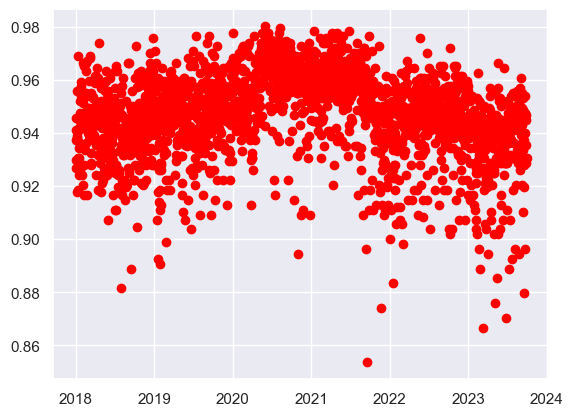

In [27]:
ax = plt.scatter(data=ttc_subway_df_daily, x= "day", y="reliability", color="red")
ax.set_xlabel('Year / Month', fontsize=18)

ax.set_ylabel('Average Reliability, Yellow Line (%)', fontsize=18)
plt.show()

In [192]:
ttc_avg_reliability = ttc_subway_df_daily["reliability"].mean()

print(ttc_avg_reliability)

0.949465601696466


In [286]:
ttc_subway_df_daily

,day,weekday,Date,Unnamed: 0,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,month_day,total_daily_rides,reliability
0,2018-01-01,0,56,56,56,56,56,56,56,56,40,56,56,56,56,56,1068,0.947566
1,2018-01-02,1,72,72,72,72,72,72,72,72,56,71,72,72,72,72,1068,0.932584
2,2018-01-03,2,64,64,64,64,64,64,64,64,56,64,64,64,64,64,1068,0.940075
3,2018-01-04,3,60,60,60,60,60,60,60,60,42,60,60,60,60,60,1068,0.943820
4,2018-01-05,4,76,76,76,76,76,76,76,76,64,76,76,76,76,76,1068,0.928839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,2023-09-26,1,63,63,63,63,63,63,63,63,37,63,63,63,63,63,1068,0.941011
2095,2023-09-27,2,73,73,73,73,73,73,73,73,55,73,73,73,73,73,1068,0.931648
2096,2023-09-28,3,57,57,57,57,57,57,57,57,35,57,57,57,57,57,1068,0.946629
2097,2023-09-29,4,52,52,52,52,52,52,52,52,34,52,52,52,52,52,1068,0.951311


In [296]:
toronto_weather = pd.read_csv("toronto_weather_simplified.csv")

toronto_weather

,Unnamed: 0,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Max Temp (°C),...,Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-01,2018,1,1,-7.8,...,NaN,0.0,NaN,0.0,NaN,NaN,25.0,NaN,52,NaN
1,1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-02,2018,1,2,-6.4,...,NaN,0.0,NaN,0.0,NaN,NaN,24.0,NaN,65,NaN
2,2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-03,2018,1,3,-4.9,...,NaN,0.0,NaN,0.0,NaN,NaN,23.0,NaN,63,NaN
3,3,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-04,2018,1,4,-7.4,...,NaN,0.0,NaN,0.0,NaN,NaN,34.0,NaN,56,NaN
4,4,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-05,2018,1,5,-14.8,...,NaN,0.0,NaN,0.0,NaN,NaN,30.0,NaN,48,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18611,14600,-79.4,43.63,TORONTO CITY CENTRE,6158359,2023-12-31,2023,12,31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18612,16425,-79.4,43.63,TORONTO CITY CENTRE,6158359,2023-12-31,2023,12,31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18613,16790,-79.4,43.63,TORONTO CITY CENTRE,6158359,2023-12-31,2023,12,31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18614,15695,-79.4,43.63,TORONTO CITY CENTRE,6158359,2023-12-31,2023,12,31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [315]:
ttc_subway_df_daily["day"] = ttc_subway_df_daily.day.astype("str")
toronto_weather["Date/Time"] = toronto_weather["Date/Time"].astype("str")

ttc_subway_daily_weather_reliability = pd.merge(left= ttc_subway_df_daily, right=toronto_weather, left_on="day", right_on="Date/Time", how="left", )
 
ttc_subway_daily_weather_reliability = ttc_subway_daily_weather_reliability[["day", "Date/Time", "Mean Temp (°C)", "reliability"]]
 
ttc_subway_daily_weather_reliability

,day,Date/Time,Mean Temp (°C),reliability
0,2018-01-01,2018-01-01,-13.1,0.947566
1,2018-01-02,2018-01-02,-9.2,0.932584
2,2018-01-03,2018-01-03,-7.6,0.940075
3,2018-01-04,2018-01-04,-13.4,0.943820
4,2018-01-05,2018-01-05,-17.8,0.928839
...,...,...,...,...
17507,2023-09-30,2023-09-30,17.6,0.941948
17508,2023-09-30,2023-09-30,17.6,0.941948
17509,2023-09-30,2023-09-30,17.6,0.941948
17510,2023-09-30,2023-09-30,17.6,0.941948


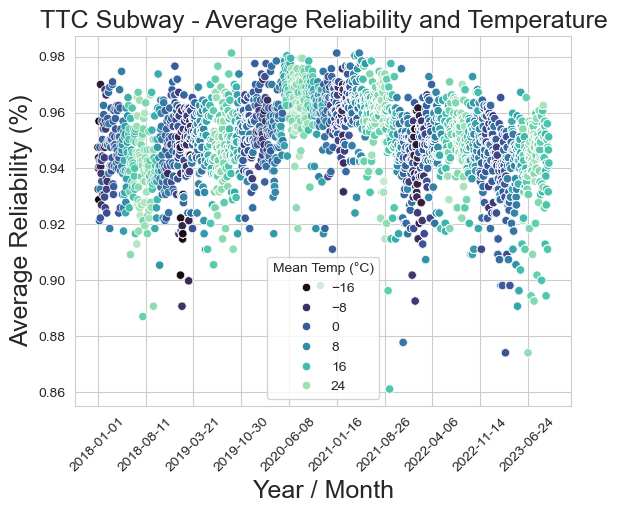

In [318]:
ax = sns.scatterplot(data=ttc_subway_daily_weather_reliability, x="day", y="reliability", hue="Mean Temp (°C)", palette="mako")
ax.set_xlabel('Year / Month', fontsize=18)
ax.set_ylabel('Average Reliability (%)', fontsize=18)
ax.set_title("TTC Subway - Average Reliability and Temperature", size=18)
desired_ticks = 10
xticks_positions = np.linspace(0, 2000, desired_ticks)
plt.xticks(xticks_positions, rotation=45)
plt.show()

### Reliability Plot

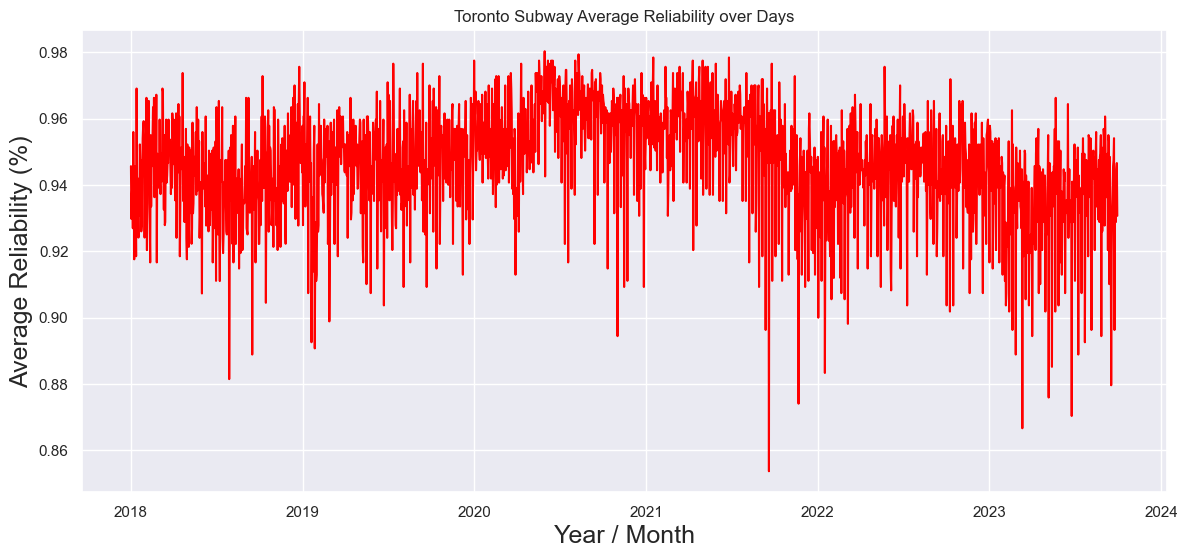

In [29]:
#Toronto subway reliability
sns.set()
plt.figure(figsize=(14, 6))

# Use lineplot instead of scatter
ax = sns.lineplot(data=ttc_subway_df_daily, x="day", y="reliability", color="red")

ax.set_xlabel('Year / Month', fontsize=18)
ax.set_ylabel('Average Reliability (%)', fontsize=18)
ax.set_title('Toronto Subway Average Reliability over Days')

plt.show()

In [ ]:
grouped_orange = ["reliability"].mean()
ax = grouped_orange.plot(color="orange")
ax.set_xlabel('Year / Month', fontsize=18)

ax.set_ylabel('Average Reliability, Orange Line (%)', fontsize=18)
plt.show()

### Montreal (STM) Subway Data


In [3]:
stm_df.head()

,Numero d'incident,Type d'incident,Cause primaire,Cause secondaire,Symptome,Ligne,Numéro de tournée,Heure de l'incident,Heure de reprise,Incident en minutes,...,CAT,Évacuation,Année civile,Année civile/mois,Mois calendrier,Jour du mois,Jour de la semaine,Jour calendaire,time_dt,delay
0,S01011901,S,Autres,Autres,Clientèle,Ligne orange,#,02:56,03:32,02 min et moins,...,0,#,2019,2019-01,1,1,2,2019-01-01,2019-01-01 02:56:00,2
1,S01011902,S,Autres,Autres,Clientèle,Ligne orange,#,02:56,03:42,02 min et moins,...,0,#,2019,2019-01,1,1,2,2019-01-01,2019-01-01 02:56:00,2
2,S01011903,S,Autres,Autres,Clientèle,Ligne verte,#,03:35,04:41,02 min et moins,...,0,#,2019,2019-01,1,1,2,2019-01-01,2019-01-01 03:35:00,2
3,S01011904,S,Autres,Autres,Clientèle,Ligne verte,#,04:56,05:36,02 min et moins,...,0,#,2019,2019-01,1,1,2,2019-01-01,2019-01-01 04:56:00,2
4,S01011905,S,Autres,Autres,Clientèle,Ligne verte,#,05:25,05:54,02 min et moins,...,0,#,2019,2019-01,1,1,2,2019-01-01,2019-01-01 05:25:00,2


In [4]:
stm_df_backup = stm_df

In [5]:
stm_df.head()

,Numero d'incident,Type d'incident,Cause primaire,Cause secondaire,Symptome,Ligne,Numéro de tournée,Heure de l'incident,Heure de reprise,Incident en minutes,...,CAT,Évacuation,Année civile,Année civile/mois,Mois calendrier,Jour du mois,Jour de la semaine,Jour calendaire,time_dt,delay
0,S01011901,S,Autres,Autres,Clientèle,Ligne orange,#,02:56,03:32,02 min et moins,...,0,#,2019,2019-01,1,1,2,2019-01-01,2019-01-01 02:56:00,2
1,S01011902,S,Autres,Autres,Clientèle,Ligne orange,#,02:56,03:42,02 min et moins,...,0,#,2019,2019-01,1,1,2,2019-01-01,2019-01-01 02:56:00,2
2,S01011903,S,Autres,Autres,Clientèle,Ligne verte,#,03:35,04:41,02 min et moins,...,0,#,2019,2019-01,1,1,2,2019-01-01,2019-01-01 03:35:00,2
3,S01011904,S,Autres,Autres,Clientèle,Ligne verte,#,04:56,05:36,02 min et moins,...,0,#,2019,2019-01,1,1,2,2019-01-01,2019-01-01 04:56:00,2
4,S01011905,S,Autres,Autres,Clientèle,Ligne verte,#,05:25,05:54,02 min et moins,...,0,#,2019,2019-01,1,1,2,2019-01-01,2019-01-01 05:25:00,2


In [6]:
stm_df.describe()

,Dommage matériel,KFS,Porte,Urgence métro,CAT,Année civile,Mois calendrier,Jour du mois,Jour de la semaine,delay
count,30794.000000,30794.000000,30794.000000,30794.000000,30794.000000,30794.000000,30794.000000,30794.000000,30794.000000,30794.000000
mean,0.008021,0.022927,0.073066,0.010619,0.157661,2020.850328,6.065143,15.605020,3.876404,3.752322
std,0.089202,0.149672,0.260249,0.102501,0.364428,1.442285,3.485202,8.801042,1.937060,4.363318
min,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,1.000000,1.000000,1.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,3.000000,8.000000,2.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,2021.000000,6.000000,16.000000,4.000000,2.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,2022.000000,9.000000,23.000000,5.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,2023.000000,12.000000,31.000000,7.000000,30.000000


In [245]:
stm_df_causes = stm_df_backup.groupby("Cause primaire").mean("delay").sort_values(by = "delay", ascending=False).reset_index()

stm_df_causes

,Cause primaire,Dommage matériel,KFS,Porte,Urgence métro,CAT,Année civile,Mois calendrier,Jour du mois,Jour de la semaine,delay
0,Clientèle,0.020602,0.064603,0.084646,0.011000,0.259625,2020.933812,6.019670,15.607626,4.005220,4.872844
1,Matériel roulant,0.003759,0.001566,0.342419,0.036028,0.058897,2020.632206,5.901003,16.024436,3.519110,4.856516
2,Équipements fixes,0.002768,0.000346,0.013841,0.021453,0.515225,2021.018339,6.342907,15.728374,3.696540,4.849827
3,#N/D,0.000000,0.000000,0.000000,0.000000,0.235294,2020.647059,7.470588,17.058824,3.764706,4.588235
4,Exploitation trains,0.001724,0.003448,0.112644,0.011494,0.075862,2020.381034,6.231034,15.200575,3.803448,3.933908
5,Autres,0.000245,0.000082,0.001063,0.000981,0.021017,2020.861384,6.056673,15.519627,3.909715,2.194717


C:\Users\katwe\AppData\Local\Temp\ipykernel_28352\2307800637.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stm_df_causes, x="Cause primaire", y = "delay", palette="viridis")


Text(0, 0.5, 'Average Delay (minutes)')

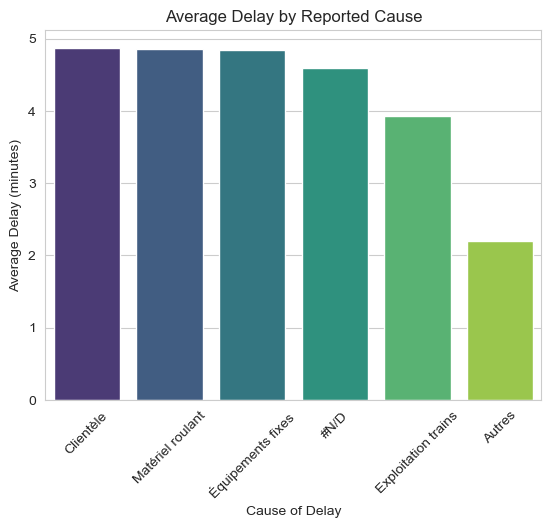

In [251]:
sns.barplot(data=stm_df_causes, x="Cause primaire", y = "delay", palette="viridis")
plt.xticks(rotation=45)
plt.title("Average Delay by Reported Cause")
plt.xlabel("Cause of Delay")
plt.ylabel("Average Delay (minutes)")

In [7]:
stm_df["cause"] = stm_df["Cause primaire"] + " " + stm_df["Cause secondaire"]

In [8]:
stm_df = stm_df.drop(columns=["Jour calendaire", "Année civile/mois", "Évacuation", "Porte", "KFS", "Véhicule", "Dommage matériel", "Urgence métro", "CAT", "Cause secondaire", "Cause primaire"])

In [9]:
translate_key = {
    "1": "verte", 
    "2": "orange",
    "4": "jaune",
    "5": "bleue"
}

stm_df["Ligne"] = stm_df["Ligne"].replace(to_replace=translate_key.keys(), value=translate_key.values())

In [23]:
stm_df["time_dt"] = pd.to_datetime(stm_df["time_dt"])

In [10]:
stm_df.groupby('Jour de la semaine')["Jour de la semaine"].count()

Jour de la semaine
1    4510
2    4618
3    4513
4    4660
5    5015
6    3976
7    3502
Name: Jour de la semaine, dtype: int64

In [11]:
orange_ridesperday_dict = {
    "1": math.ceil((1.5+7+6.5)*60/5.5 + (2+2)*60/4.5),
    "2": math.ceil((1.5+7+6.5)*60/5.5 + (2+2)*60/4.5),
    "3": math.ceil((1.5+7+6.5)*60/5.5 + (2+2)*60/4.5),
    "4": math.ceil((1.5+7+6.5)*60/5.5 + (2+2)*60/4.5),
    "5": math.ceil((1.5+7+6.5)*60/5.5 + (2+2)*60/4.5),
    "6": math.ceil(19.5*60/8),
    "7": math.ceil(19*60/8)
}

In [12]:
verte_ridesperday_dict = {
    "1": math.ceil((1+7+7.25)*60/6.5 + (2+2)*60/3.5),
    "2": math.ceil((1+7+7.25)*60/6.5 + (2+2)*60/3.5),
    "3": math.ceil((1+7+7.25)*60/6.5 + (2+2)*60/3.5),
    "4": math.ceil((1+7+7.25)*60/6.5 + (2+2)*60/3.5),
    "5": math.ceil((1+7+7.25)*60/6.5 + (2+2)*60/3.5),
    "6": math.ceil(19.5*60/9),
    "7": math.ceil(19*60/9)
}

In [13]:
jaune_ridesperday_dict = {
    "1": math.ceil((1.5+7+7)*60/6.5 + (2+2)*60/3.5),
    "2": math.ceil((1.5+7+7)*60/6.5 + (2+2)*60/3.5),
    "3": math.ceil((1.5+7+7)*60/6.5 + (2+2)*60/3.5),
    "4": math.ceil((1.5+7+7)*60/6.5 + (2+2)*60/3.5),
    "5": math.ceil((1.5+7+7)*60/6.5 + (2+2)*60/3.5),
    "6": math.ceil(19.5*60/8),
    "7": math.ceil(19*60/8)
}

In [14]:
bleue_ridesperday_dict = {
    "1": math.ceil((1.5+7+6.75)*60/7 + (2+2)*60/5),
    "2": math.ceil((1.5+7+6.75)*60/7 + (2+2)*60/5),
    "3": math.ceil((1.5+7+6.75)*60/7 + (2+2)*60/5),
    "4": math.ceil((1.5+7+6.75)*60/7 + (2+2)*60/5),
    "5": math.ceil((1.5+7+6.75)*60/7 + (2+2)*60/5),
    "6": math.ceil(19.5*60/9.5),
    "7": math.ceil(19*60/9.5)
}

In [15]:
avg_daily_rides = {
    "1": 205,
    "2": 205,
    "3": 205,
    "4": 205,
    "5": 205,
    "6": 135,
    "7": 130
}

In [17]:
print("Orange: ", orange_ridesperday_dict)
print("Verte: ", verte_ridesperday_dict)
print("Jaune: ", jaune_ridesperday_dict)
print("Bleue: ", bleue_ridesperday_dict)
print("Avg: ", avg_daily_rides)

Orange:  {'1': 217, '2': 217, '3': 217, '4': 217, '5': 217, '6': 147, '7': 143}
Verte:  {'1': 210, '2': 210, '3': 210, '4': 210, '5': 210, '6': 130, '7': 127}
Jaune:  {'1': 212, '2': 212, '3': 212, '4': 212, '5': 212, '6': 147, '7': 143}
Bleue:  {'1': 179, '2': 179, '3': 179, '4': 179, '5': 179, '6': 124, '7': 120}
Avg:  {'1': 205, '2': 205, '3': 205, '4': 205, '5': 205, '6': 135, '7': 130}


In [18]:
row_collector = []

for row in stm_df["Ligne"]:
    print(row)
    if row.find("1") >= 0:
        temp = "Multi-Line"
    elif row.find("2") >= 0:
        temp = "Multi-Line"
    elif row.find("4") >= 0:
        temp = "Multi-Line"
    elif row.find("5") >= 0:
        temp = "Multi-Line"
    else:
        temp = row
    row_collector.append(temp)

stm_df["Ligne"] = row_collector

stm_df.head()
    

Ligne orange
Ligne orange
Ligne verte
Ligne verte
Ligne verte
Ligne verte
Ligne verte
Ligne verte
Ligne verte
Ligne verte
Ligne orange
Ligne orange
Ligne orange
Ligne verte
Ligne verte
Ligne verte
Ligne verte
Ligne orange
Ligne verte
Ligne orange
Ligne verte
Ligne orange
Ligne bleue
Ligne orange
Ligne verte
Ligne orange
Ligne verte
Ligne orange
Ligne verte
Ligne orange
Ligne verte
Ligne orange
Ligne bleue
Ligne verte
Ligne bleue
Ligne verte
Ligne orange
Ligne verte
Ligne verte
Ligne verte
Ligne orange
Ligne verte
Ligne orange
Ligne verte
Ligne verte
Ligne bleue
Ligne bleue
Ligne orange
Ligne verte
Ligne verte
Ligne orange
Ligne orange
Ligne verte
Ligne verte
Ligne orange
Ligne orange
Ligne orange
Ligne verte
Ligne bleue
Ligne verte
Ligne verte
Ligne verte
Ligne orange
Ligne orange
Ligne verte
Ligne verte
Ligne verte
Ligne orange
Ligne verte
Ligne verte
Ligne orange
Ligne orange
Ligne verte
Ligne bleue
Ligne verte
Ligne verte
Ligne verte
Ligne verte
Ligne verte
Ligne bleue
Ligne verte
L

,Numero d'incident,Type d'incident,Symptome,Ligne,Numéro de tournée,Heure de l'incident,Heure de reprise,Incident en minutes,Porte de voiture,Type de matériel,Code de lieu,Année civile,Mois calendrier,Jour du mois,Jour de la semaine,time_dt,delay,cause
0,S01011901,S,Clientèle,Ligne orange,#,02:56,03:32,02 min et moins,#,Non affecté,Snowdon,2019,1,1,2,2019-01-01 02:56:00,2,Autres Autres
1,S01011902,S,Clientèle,Ligne orange,#,02:56,03:42,02 min et moins,#,Non affecté,Snowdon,2019,1,1,2,2019-01-01 02:56:00,2,Autres Autres
2,S01011903,S,Clientèle,Ligne verte,#,03:35,04:41,02 min et moins,#,Non affecté,Place-des-Arts,2019,1,1,2,2019-01-01 03:35:00,2,Autres Autres
3,S01011904,S,Clientèle,Ligne verte,#,04:56,05:36,02 min et moins,#,Non affecté,Lionel-Groulx,2019,1,1,2,2019-01-01 04:56:00,2,Autres Autres
4,S01011905,S,Clientèle,Ligne verte,#,05:25,05:54,02 min et moins,#,Non affecté,Berri-UQAM,2019,1,1,2,2019-01-01 05:25:00,2,Autres Autres


In [19]:
stm_df = stm_df[stm_df["Ligne"] != "Non affecté"]

In [20]:
stm_df.head()

,Numero d'incident,Type d'incident,Symptome,Ligne,Numéro de tournée,Heure de l'incident,Heure de reprise,Incident en minutes,Porte de voiture,Type de matériel,Code de lieu,Année civile,Mois calendrier,Jour du mois,Jour de la semaine,time_dt,delay,cause
0,S01011901,S,Clientèle,Ligne orange,#,02:56,03:32,02 min et moins,#,Non affecté,Snowdon,2019,1,1,2,2019-01-01 02:56:00,2,Autres Autres
1,S01011902,S,Clientèle,Ligne orange,#,02:56,03:42,02 min et moins,#,Non affecté,Snowdon,2019,1,1,2,2019-01-01 02:56:00,2,Autres Autres
2,S01011903,S,Clientèle,Ligne verte,#,03:35,04:41,02 min et moins,#,Non affecté,Place-des-Arts,2019,1,1,2,2019-01-01 03:35:00,2,Autres Autres
3,S01011904,S,Clientèle,Ligne verte,#,04:56,05:36,02 min et moins,#,Non affecté,Lionel-Groulx,2019,1,1,2,2019-01-01 04:56:00,2,Autres Autres
4,S01011905,S,Clientèle,Ligne verte,#,05:25,05:54,02 min et moins,#,Non affecté,Berri-UQAM,2019,1,1,2,2019-01-01 05:25:00,2,Autres Autres


In [24]:
stm_df["date"] = stm_df["time_dt"].dt.date

stm_delay_perday = stm_df.groupby(["date", "Jour de la semaine", "Ligne"]).count().reset_index()

In [25]:
stm_delay_perday.head()

,date,Jour de la semaine,Ligne,Numero d'incident,Type d'incident,Symptome,Numéro de tournée,Heure de l'incident,Heure de reprise,Incident en minutes,Porte de voiture,Type de matériel,Code de lieu,Année civile,Mois calendrier,Jour du mois,time_dt,delay,cause
0,2019-01-01,2,Ligne bleue,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2019-01-01,2,Ligne orange,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
2,2019-01-01,2,Ligne verte,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
3,2019-01-02,3,Ligne bleue,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,2019-01-02,3,Ligne jaune,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [26]:
stm_delay_perday.head()

stm_delay_perday["weekday"] = stm_delay_perday["Jour de la semaine"] + 1
 
stm_delay_perday.head()

,date,Jour de la semaine,Ligne,Numero d'incident,Type d'incident,Symptome,Numéro de tournée,Heure de l'incident,Heure de reprise,Incident en minutes,Porte de voiture,Type de matériel,Code de lieu,Année civile,Mois calendrier,Jour du mois,time_dt,delay,cause,weekday
0,2019-01-01,2,Ligne bleue,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3
1,2019-01-01,2,Ligne orange,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,3
2,2019-01-01,2,Ligne verte,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,3
3,2019-01-02,3,Ligne bleue,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4
4,2019-01-02,3,Ligne jaune,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4


In [60]:
def define_daily_rides(row_temp):
    line_temp = str(row_temp["Ligne"])
    day = str(row_temp["weekday"])
    print(line_temp)
    
    if line_temp == "Ligne bleue":
        return bleue_ridesperday_dict.get(day)
    elif line_temp == "Ligne orange":
        return orange_ridesperday_dict.get(day)
    elif line_temp == "Ligne verte":
        return verte_ridesperday_dict.get(day)
    elif line_temp == "Ligne jaune":
        return jaune_ridesperday_dict.get(day)
    else: 
        print("returned other")
        return avg_daily_rides.get(day)

In [61]:
stm_delay_perday["total_daily_rides"] = stm_delay_perday.apply(define_daily_rides, axis=1)

Ligne bleue
Ligne orange
Ligne verte
Ligne bleue
Ligne jaune
Ligne orange
Ligne verte
Ligne verte
Ligne bleue
Ligne orange
Ligne verte
Ligne bleue
Ligne jaune
Ligne orange
Ligne verte
Ligne bleue
Ligne jaune
Ligne orange
Ligne verte
Ligne bleue
Ligne orange
Ligne verte
Ligne bleue
Ligne jaune
Ligne orange
Ligne verte
Ligne verte
Ligne verte
Ligne bleue
Ligne orange
Ligne verte
Ligne bleue
Ligne verte
Ligne bleue
Ligne jaune
Ligne orange
Ligne verte
Multi-Line
returned other
Ligne verte
Ligne bleue
Ligne jaune
Ligne orange
Ligne verte
Ligne orange
Ligne verte
Ligne orange
Ligne verte
Ligne orange
Ligne verte
Ligne bleue
Ligne orange
Ligne verte
Ligne bleue
Ligne jaune
Ligne orange
Ligne verte
Multi-Line
returned other
Ligne bleue
Ligne jaune
Ligne orange
Ligne verte
Ligne bleue
Ligne jaune
Ligne orange
Ligne verte
Ligne bleue
Ligne jaune
Ligne orange
Ligne verte
Ligne jaune
Ligne orange
Ligne verte
Multi-Line
returned other
Ligne bleue
Ligne jaune
Ligne orange
Ligne verte
Multi-Line
ret

In [63]:
stm_delay_perday

,date,Jour de la semaine,Ligne,Numero d'incident,Type d'incident,Symptome,Numéro de tournée,Heure de l'incident,Heure de reprise,Incident en minutes,...,Type de matériel,Code de lieu,Année civile,Mois calendrier,Jour du mois,time_dt,delay,cause,weekday,total_daily_rides
0,2019-01-01,2,Ligne bleue,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,3,179.0
1,2019-01-01,2,Ligne orange,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,3,217.0
2,2019-01-01,2,Ligne verte,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,3,210.0
3,2019-01-02,3,Ligne bleue,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,4,179.0
4,2019-01-02,3,Ligne jaune,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,4,212.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,2023-09-30,6,Ligne jaune,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,7,143.0
7036,2023-09-30,6,Ligne orange,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,7,143.0
7037,2023-09-30,6,Ligne verte,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,7,127.0
7038,2023-09-30,6,Multi-Line,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,7,130.0


In [64]:
stm_delay_perday["reliability"] = 1 - stm_delay_perday["delay"] / stm_delay_perday["total_daily_rides"]

stm_delay_perday

,date,Jour de la semaine,Ligne,Numero d'incident,Type d'incident,Symptome,Numéro de tournée,Heure de l'incident,Heure de reprise,Incident en minutes,...,Code de lieu,Année civile,Mois calendrier,Jour du mois,time_dt,delay,cause,weekday,total_daily_rides,reliability
0,2019-01-01,2,Ligne bleue,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,3,179.0,0.994413
1,2019-01-01,2,Ligne orange,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,3,217.0,0.958525
2,2019-01-01,2,Ligne verte,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,3,210.0,0.933333
3,2019-01-02,3,Ligne bleue,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,4,179.0,0.994413
4,2019-01-02,3,Ligne jaune,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,4,212.0,0.995283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,2023-09-30,6,Ligne jaune,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,7,143.0,0.993007
7036,2023-09-30,6,Ligne orange,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,7,143.0,0.937063
7037,2023-09-30,6,Ligne verte,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,7,127.0,0.960630
7038,2023-09-30,6,Multi-Line,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,7,130.0,0.992308


### Montreal Weather 

In [65]:
montreal_weather_df = pd.read_csv("montreal_weather_simplified.csv")

In [86]:
montreal_weather_means = montreal_weather_df[["Mean Temp (°C)", "Date/Time"]]
montreal_weather_means

,Mean Temp (°C),Date/Time
0,-4.7,2019-01-01
1,-12.0,2019-01-02
2,-8.4,2019-01-03
3,0.0,2019-01-04
4,1.7,2019-01-05
...,...,...
1456,-6.4,2022-12-27
1457,-2.0,2022-12-28
1458,2.9,2022-12-29
1459,7.5,2022-12-30


In [92]:
stm_df_temp = stm_df
stm_df_temp["date"] = stm_df_temp["date"].astype(str)

stm_df_weather = pd.merge(left=stm_df, right=montreal_weather_means, left_on="date", right_on="Date/Time", how="left")

In [93]:
stm_df_weather

,Numero d'incident,Type d'incident,Symptome,Ligne,Numéro de tournée,Heure de l'incident,Heure de reprise,Incident en minutes,Porte de voiture,Type de matériel,...,Année civile,Mois calendrier,Jour du mois,Jour de la semaine,time_dt,delay,cause,date,Mean Temp (°C),Date/Time
0,S01011901,S,Clientèle,Ligne orange,#,02:56,03:32,02 min et moins,#,Non affecté,...,2019,1,1,2,2019-01-01 02:56:00,2,Autres Autres,2019-01-01,-4.7,2019-01-01
1,S01011902,S,Clientèle,Ligne orange,#,02:56,03:42,02 min et moins,#,Non affecté,...,2019,1,1,2,2019-01-01 02:56:00,2,Autres Autres,2019-01-01,-4.7,2019-01-01
2,S01011903,S,Clientèle,Ligne verte,#,03:35,04:41,02 min et moins,#,Non affecté,...,2019,1,1,2,2019-01-01 03:35:00,2,Autres Autres,2019-01-01,-4.7,2019-01-01
3,S01011904,S,Clientèle,Ligne verte,#,04:56,05:36,02 min et moins,#,Non affecté,...,2019,1,1,2,2019-01-01 04:56:00,2,Autres Autres,2019-01-01,-4.7,2019-01-01
4,S01011905,S,Clientèle,Ligne verte,#,05:25,05:54,02 min et moins,#,Non affecté,...,2019,1,1,2,2019-01-01 05:25:00,2,Autres Autres,2019-01-01,-4.7,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30732,T31122211,T,Clientèle,Ligne verte,#,19:02,19:02,02 min et moins,#,Non affecté,...,2022,12,31,6,2022-12-31 19:02:00,2,Clientèle Méfait volontaire,2022-12-31,6.7,2022-12-31
30733,T31122212,T,"Feu, fumée, odeur, produit, etc...",Ligne orange,6,20:38,20:38,02 min et moins,#,Non affecté,...,2022,12,31,6,2022-12-31 20:38:00,2,Clientèle Méfait volontaire,2022-12-31,6.7,2022-12-31
30734,T31122213,T,"Feu, fumée, odeur, produit, etc...",Ligne verte,13,21:59,22:03,03 à 04 min,#,Non affecté,...,2022,12,31,6,2022-12-31 21:59:00,4,Clientèle Méfait volontaire,2022-12-31,6.7,2022-12-31
30735,T31122214,T,Matériel roulant,Ligne verte,1,23:43,23:45,02 min et moins,#,Non affecté,...,2022,12,31,6,2022-12-31 23:43:00,2,Clientèle Nuisance involontaire,2022-12-31,6.7,2022-12-31


<Axes: xlabel='date'>

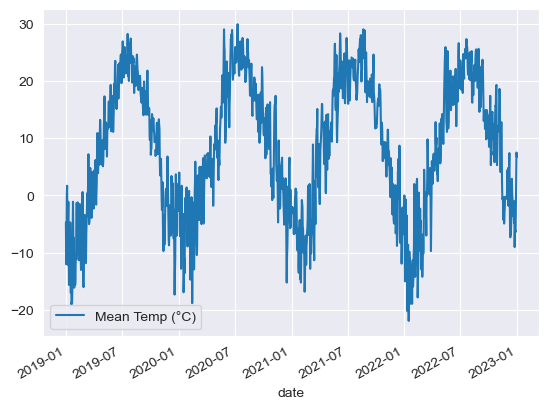

In [101]:
stm_df_weather["date"] = pd.to_datetime(stm_df_weather["date"])
stm_df_weather.plot(x="date", y="Mean Temp (°C)")

In [256]:
stm_df_weather.head()

,Numero d'incident,Type d'incident,Symptome,Ligne,Numéro de tournée,Heure de l'incident,Heure de reprise,Incident en minutes,Porte de voiture,Type de matériel,...,Année civile,Mois calendrier,Jour du mois,Jour de la semaine,time_dt,delay,cause,date,Mean Temp (°C),Date/Time
0,S01011901,S,Clientèle,Ligne orange,#,02:56,03:32,02 min et moins,#,Non affecté,...,2019,1,1,2,2019-01-01 02:56:00,2,Autres Autres,2019-01-01,-4.7,2019-01-01
1,S01011902,S,Clientèle,Ligne orange,#,02:56,03:42,02 min et moins,#,Non affecté,...,2019,1,1,2,2019-01-01 02:56:00,2,Autres Autres,2019-01-01,-4.7,2019-01-01
2,S01011903,S,Clientèle,Ligne verte,#,03:35,04:41,02 min et moins,#,Non affecté,...,2019,1,1,2,2019-01-01 03:35:00,2,Autres Autres,2019-01-01,-4.7,2019-01-01
3,S01011904,S,Clientèle,Ligne verte,#,04:56,05:36,02 min et moins,#,Non affecté,...,2019,1,1,2,2019-01-01 04:56:00,2,Autres Autres,2019-01-01,-4.7,2019-01-01
4,S01011905,S,Clientèle,Ligne verte,#,05:25,05:54,02 min et moins,#,Non affecté,...,2019,1,1,2,2019-01-01 05:25:00,2,Autres Autres,2019-01-01,-4.7,2019-01-01


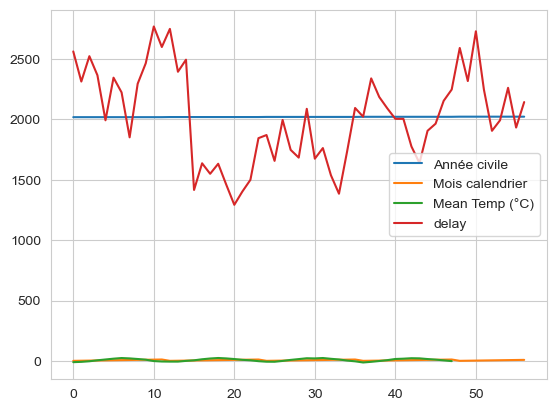

In [137]:
stm_df_weather_monthly = stm_df_weather.groupby(["Année civile", "Mois calendrier"]).agg({"Mean Temp (°C)": 'mean', "delay": 'sum'}).reset_index()

ax = stm_df_weather_monthly.plot()


In [266]:
stm_df_weather_daily = stm_df_weather.groupby(["date", "Ligne"])[["delay", "Mean Temp (°C)"]].mean().reset_index()

stm_df_weather_daily

,date,Ligne,delay,Mean Temp (°C)
0,2019-01-01,Ligne bleue,2.000000,-4.7
1,2019-01-01,Ligne orange,4.222222,-4.7
2,2019-01-01,Ligne verte,3.000000,-4.7
3,2019-01-02,Ligne bleue,2.000000,-12.0
4,2019-01-02,Ligne jaune,2.000000,-12.0
...,...,...,...,...
5913,2023-09-30,Ligne jaune,14.000000,NaN
5914,2023-09-30,Ligne orange,3.300000,NaN
5915,2023-09-30,Ligne verte,2.000000,NaN
5916,2023-09-30,Multi-Line,19.000000,NaN


In [272]:
stm_delay_perday["date"] = stm_delay_perday["date"].astype(str)
stm_df_weather_daily["date"] = stm_df_weather_daily["date"].astype(str)

stm_df_weather_reliability = pd.merge(left=stm_df_weather_daily, right= stm_delay_perday, left_on=["date", "Ligne"], right_on=["date", "Ligne"], how="left")

stm_df_weather_reliability.drop(columns=["Jour de la semaine", "Jour du mois", "Numero d\'incident", "Type d\'incident", "Symptome", "Numéro de tournée", "Heure de l\'incident", "Heure de reprise", "Incident en minutes", "Porte de voiture", "Type de matériel", "Code de lieu", "time_dt", "delay_y", "cause", "weekday"], inplace=True)

stm_df_weather_reliability = stm_df_weather_reliability.groupby("date").mean(["Mean Temp (°C)", "reliability"])

stm_df_weather_reliability

,delay_x,Mean Temp (°C),Année civile,Mois calendrier,total_daily_rides,reliability
date,,,,,,
2019-01-01,3.074074,-4.7,8.000000,8.000000,202.000000,0.962091
2019-01-02,2.333333,-12.0,2.250000,2.250000,204.500000,0.989206
2019-01-03,5.987500,-8.4,4.750000,4.750000,204.000000,0.977482
2019-01-04,3.159722,0.0,5.000000,5.000000,137.000000,0.963576
2019-01-05,2.458333,1.7,3.000000,3.000000,133.250000,0.976694
...,...,...,...,...,...,...
2023-09-27,6.095238,NaN,3.000000,3.000000,207.500000,0.985652
2023-09-28,2.800595,NaN,5.750000,5.750000,204.500000,0.972498
2023-09-29,6.500000,NaN,2.714286,2.714286,153.142857,0.980845


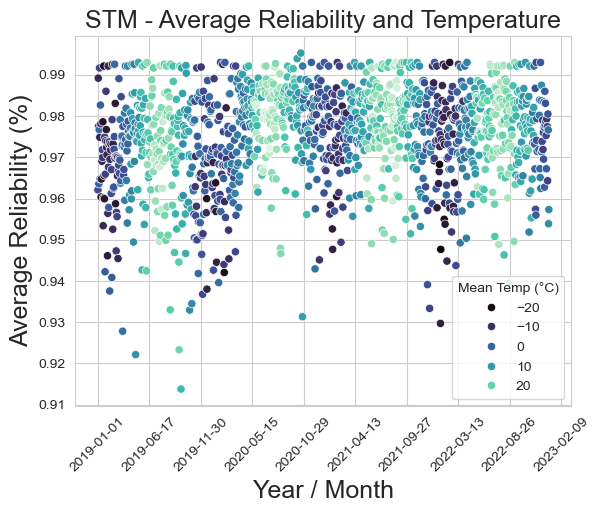

In [285]:
ax = sns.scatterplot(data=stm_df_weather_reliability, x="date", y="reliability", hue="Mean Temp (°C)", palette="mako")
ax.set_xlabel('Year / Month', fontsize=18)
ax.set_ylabel('Average Reliability (%)', fontsize=18)
ax.set_title("STM - Average Reliability and Temperature", size=18)
desired_ticks = 10
xticks_positions = np.linspace(0, 1500, desired_ticks)
plt.xticks(xticks_positions, rotation=45)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


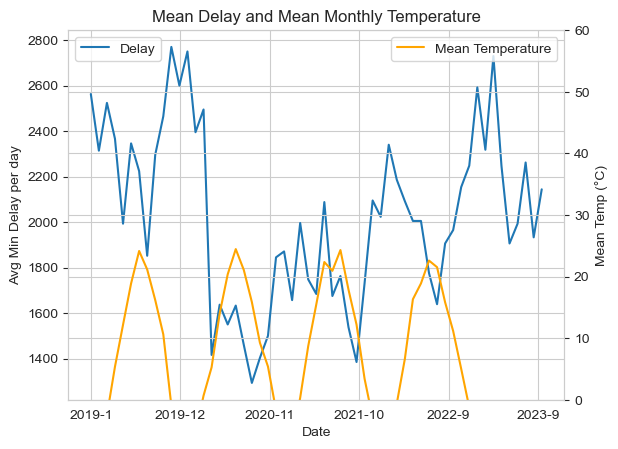

In [138]:
stm_df_weather_monthly["year-month"] = stm_df_weather_monthly["Année civile"].astype(str) + "-" + stm_df_weather_monthly["Mois calendrier"].astype(str)


#First line and first axis
ax1= sns.lineplot(x="year-month", y='delay', data=stm_df_weather_monthly, label= 'Delay')
ax1.set_ylabel('Avg Min Delay per day')
ax1.set_xlabel('Date')
# ax1.set_ylim([0, 23000])
ax1.legend(loc='upper left')
# ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
desired_ticks = 10
xticks_positions = np.linspace(0, 100, desired_ticks)
plt.xticks(xticks_positions)

# Second line on the second y-axis
ax2 = ax1.twinx()
ax2.set_ylim([0, 60])
ax2.set_ylabel('Mean Temp (°C)')
ax2.set_xlabel('Date')
ax2.legend(loc='upper right')
sns.lineplot(x="year-month", y='Mean Temp (°C)', data=stm_df_weather_monthly, ax=ax2, color='orange', label='Mean Temperature')

# Limit the range (excluding last date which has no data)
# plt.xlim([pd.to_datetime('2019-05-08'), pd.to_datetime('2019-06-22')])
plt.title('Mean Delay and Mean Monthly Temperature')

plt.show()

## STM GRAPHS AND STATS


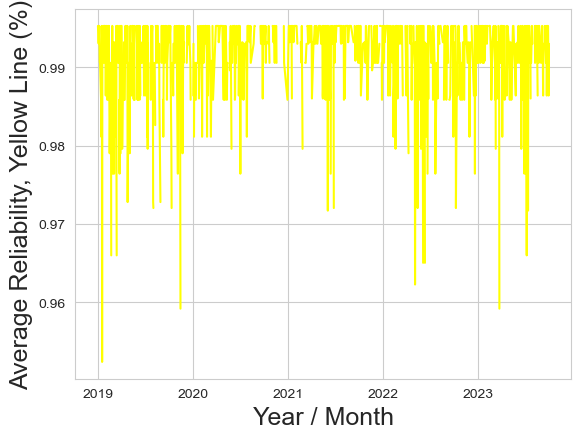

In [128]:
grouped_jaune = stm_delay_perday[stm_delay_perday["Ligne"] == "Ligne jaune"].groupby("date")["reliability"].mean()
ax = grouped_jaune.plot(color="yellow")
ax.set_xlabel('Year / Month', fontsize=18)

ax.set_ylabel('Average Reliability, Yellow Line (%)', fontsize=18)
plt.show()

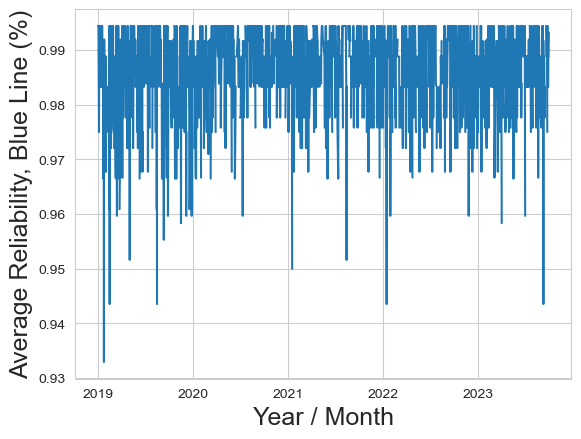

In [139]:
grouped_bleue = stm_delay_perday[stm_delay_perday["Ligne"] == "Ligne bleue"].groupby("date")["reliability"].mean()
ax = grouped_bleue.plot()
ax.set_xlabel('Year / Month', fontsize=18)

ax.set_ylabel('Average Reliability, Blue Line (%)', fontsize=18)
plt.show()

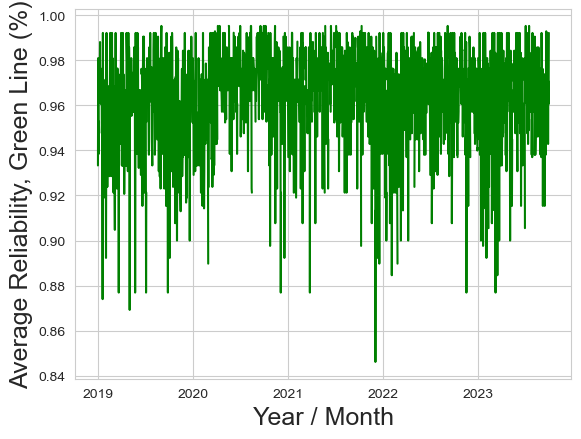

In [140]:
grouped_verte = stm_delay_perday[stm_delay_perday["Ligne"] == "Ligne verte"].groupby("date")["reliability"].mean()
ax = grouped_verte.plot(color="green")
ax.set_xlabel('Year / Month', fontsize=18)

ax.set_ylabel('Average Reliability, Green Line (%)', fontsize=18)
plt.show()

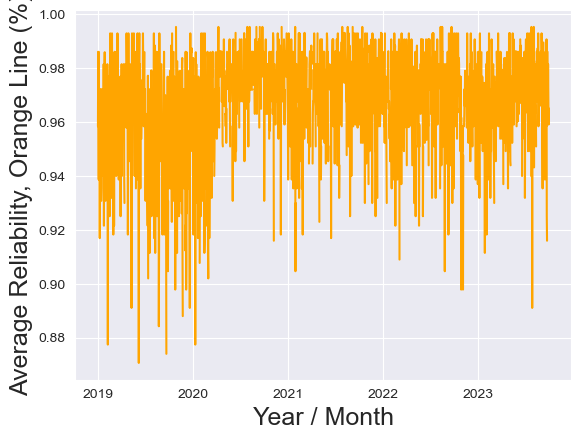

In [255]:
grouped_orange = stm_delay_perday[stm_delay_perday["Ligne"] == "Ligne orange"].groupby("date")["reliability"].mean()
ax = grouped_orange.plot(color="orange")
ax.set_xlabel('Year / Month', fontsize=18)

ax.set_ylabel('Average Reliability, Orange Line (%)', fontsize=18)
plt.show()

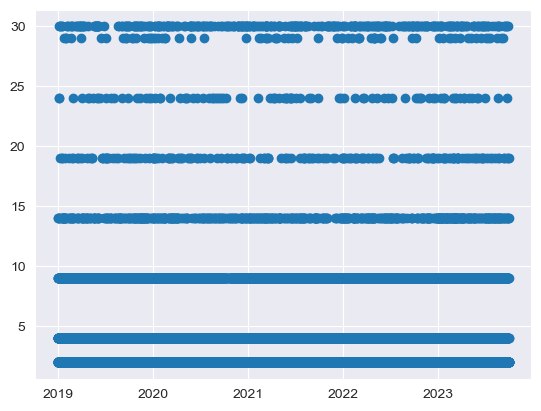

In [254]:
plt.scatter(stm_df['time_dt'], stm_df['delay'])
plt.show()

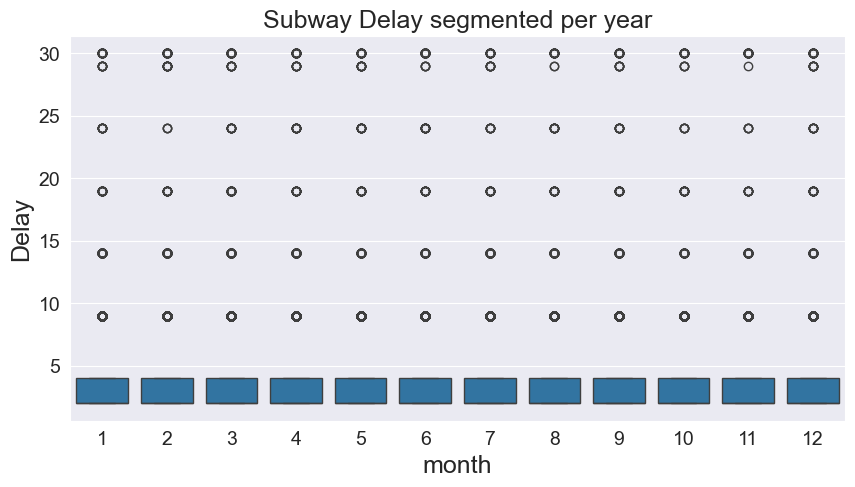

In [100]:
# PLot boxplot of delay per year
plt.figure(figsize=(10, 5))
plt.title('Subway Delay segmented per year', fontsize=18)
ax = sns.boxplot(x = stm_df['Mois calendrier'] , y = stm_df['delay'])
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('month', fontsize=18)
ax.set_ylabel('Delay', fontsize=18)
plt.show()

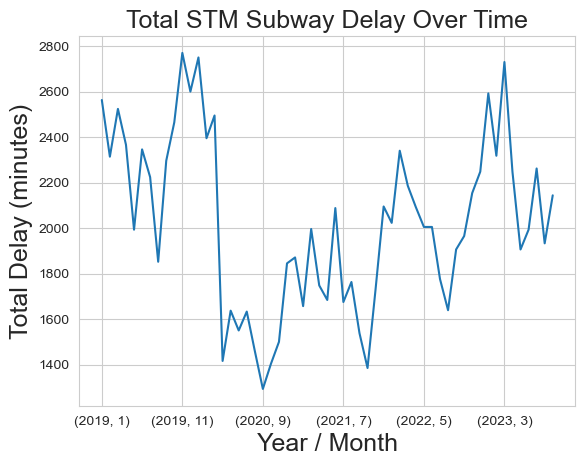

In [252]:
ax = stm_df.groupby(["Année civile", "Mois calendrier"])["delay"].sum().plot()
ax.set_xlabel('Year / Month', fontsize=18)
ax.set_ylabel('Total Delay (minutes)', fontsize=18)
plt.title('Total STM Subway Delay Over Time', fontsize=18)
plt.show()

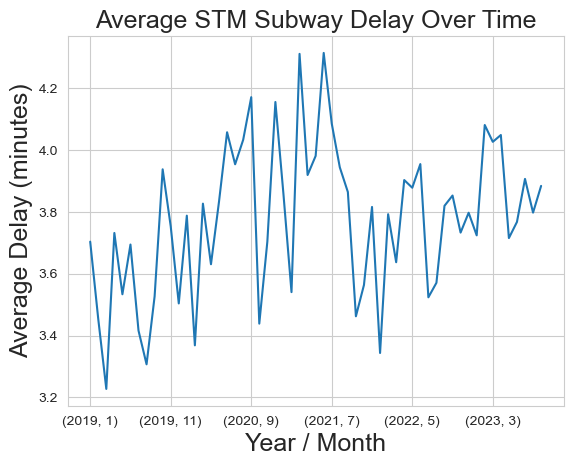

In [253]:
ax = stm_df.groupby(["Année civile", "Mois calendrier"])["delay"].mean().plot()
ax.set_xlabel('Year / Month', fontsize=18)
ax.set_ylabel('Average Delay (minutes)', fontsize=18)
plt.title('Average STM Subway Delay Over Time', fontsize=18)
plt.show()

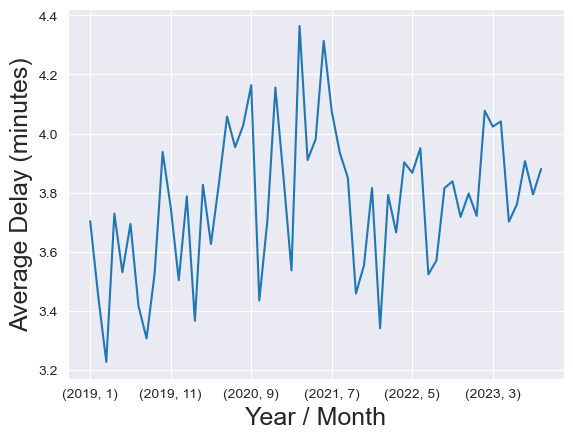

In [107]:
ax = stm_df.groupby(["Année civile", "Mois calendrier"])["delay"].mean().plot()
ax.set_xlabel('Year / Month', fontsize=18)
ax.set_ylabel('Average Delay (minutes)', fontsize=18)
plt.show()

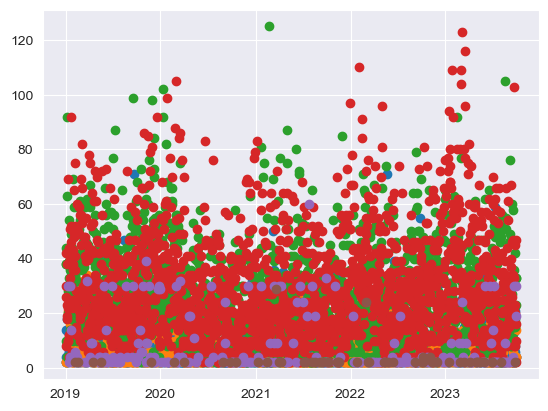

In [118]:
grouped = stm_df.groupby(['Ligne', stm_df['time_dt'].dt.date])['delay'].sum().reset_index()

# Plot summed delay for each day for each line
for line, group in grouped.groupby('Ligne'):
    plt.scatter(group['time_dt'], group['delay'], label=line)


# Set labels and title
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Total Daily Delay (minutes)', fontsize=18)
plt.show()

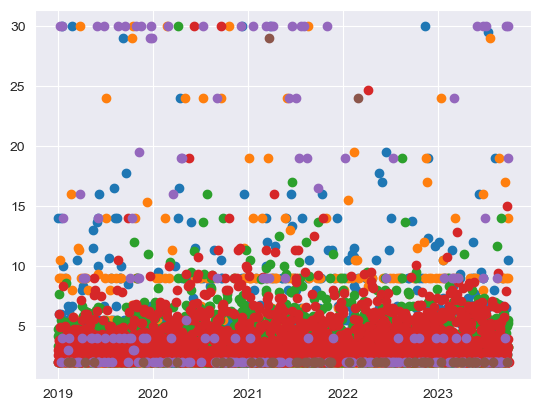

In [119]:
grouped = stm_df.groupby(['Ligne', stm_df['time_dt'].dt.date])['delay'].mean().reset_index()

# Plot summed delay for each day for each line
for line, group in grouped.groupby('Ligne'):
    plt.scatter(group['time_dt'], group['delay'], label=line)

# Set labels and title
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Average Delay (minutes)', fontsize=18)
plt.show()

In [121]:
delay_by_month = stm_df.groupby(["Mois calendrier", "Année civile"])["delay"].sum()

delay_by_month

Mois calendrier  Année civile
1                2019            2563
                 2020            2750
                 2021            1873
                 2022            2025
                 2023            2594
2                2019            2318
                 2020            2397
                 2021            1659
                 2022            2340
                 2023            2320
3                2019            2524
                 2020            2495
                 2021            2025
                 2022            2214
                 2023            2732
4                2019            2368
                 2020            1418
                 2021            1752
                 2022            2092
                 2023            2251
5                2019            1995
                 2020            1637
                 2021            1684
                 2022            2011
                 2023            1914
6                201

In [181]:
avg_delay_by_month = stm_df.groupby(["Mois calendrier", "Année civile"])["delay"].mean()

avg_delay_by_month

Mois calendrier  Année civile
1                2019            3.703757
                 2020            3.787879
                 2021            3.857732
                 2022            3.343802
                 2023            3.724138
2                2019            3.453731
                 2020            3.368495
                 2021            3.540598
                 2022            3.792545
                 2023            4.080986
3                2019            3.227621
                 2020            3.826687
                 2021            4.311015
                 2022            3.637271
                 2023            4.026549
4                2019            3.731861
                 2020            3.630769
                 2021            3.919283
                 2022            3.902985
                 2023            4.048649
5                2019            3.533688
                 2020            3.833724
                 2021            3.981087
    

In [183]:
stm_average_delay = avg_delay_by_month.mean()
print(stm_average_delay)

3.7749146558617572


In [184]:
stm_delay_perday


,date,Jour de la semaine,Ligne,Numero d'incident,Type d'incident,Symptome,Numéro de tournée,Heure de l'incident,Heure de reprise,Incident en minutes,...,Code de lieu,Année civile,Mois calendrier,Jour du mois,time_dt,delay,cause,weekday,total_daily_rides,reliability
0,2019-01-01,2,Ligne bleue,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,3,179.0,0.994413
1,2019-01-01,2,Ligne orange,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,3,217.0,0.958525
2,2019-01-01,2,Ligne verte,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,3,210.0,0.933333
3,2019-01-02,3,Ligne bleue,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,4,179.0,0.994413
4,2019-01-02,3,Ligne jaune,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,4,212.0,0.995283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,2023-09-30,6,Ligne jaune,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,7,143.0,0.993007
7036,2023-09-30,6,Ligne orange,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,7,143.0,0.937063
7037,2023-09-30,6,Ligne verte,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,7,127.0,0.960630
7038,2023-09-30,6,Multi-Line,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,7,130.0,0.992308


In [186]:
stm_average_reliability = stm_delay_perday["reliability"].mean()

print(stm_average_reliability)

0.9746171054705542
